In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
root_directory = '/content/drive/MyDrive/Komilo_proj/Datasets'
fname = 'P1_Temperature_Data'
appended_data = pd.read_excel(f'{root_directory}/{fname}.xlsx')


In [ ]:
appended_data = pd.read_excel(f'{root_directory}/{fname}.xlsx')
appended_data.columns = ['Date', 'Time', 'Env_temp', 'Cow_temp', 'Status_1', 'Status_2']

In [ ]:
appended_data

,Date,Time,Env_temp,Cow_temp,Status_1,Status_2
0,30,09:00:02,0.2284,-0.0506,NaN,NaN
1,30,09:00:03,0.4861,-0.0745,NaN,NaN
2,30,09:00:04,0.3973,-0.6965,NaN,NaN
3,30,09:00:05,0.5569,-0.2474,NaN,NaN
4,30,09:00:06,0.3905,0.6600,NaN,NaN
...,...,...,...,...,...,...
584429,7,03:20:31,0.9702,-0.0899,NaN,NaN
584430,7,03:20:32,0.7286,-0.4668,NaN,NaN
584431,7,03:20:33,0.8549,-0.3365,NaN,NaN
584432,7,03:20:34,0.7283,-0.4682,NaN,NaN


In [ ]:
missing_status_1 = appended_data[appended_data[['Status_1']].isnull().values]
missing_status_1
len(missing_status_1)

,Date,Time,Env_temp,Cow_temp,Status_1,Status_2
0,30,09:00:02,0.2284,-0.0506,NaN,NaN
1,30,09:00:03,0.4861,-0.0745,NaN,NaN
2,30,09:00:04,0.3973,-0.6965,NaN,NaN
3,30,09:00:05,0.5569,-0.2474,NaN,NaN
4,30,09:00:06,0.3905,0.6600,NaN,NaN
...,...,...,...,...,...,...
584429,7,03:20:31,0.9702,-0.0899,NaN,NaN
584430,7,03:20:32,0.7286,-0.4668,NaN,NaN
584431,7,03:20:33,0.8549,-0.3365,NaN,NaN
584432,7,03:20:34,0.7283,-0.4682,NaN,NaN


444898

In [ ]:
missing_status_2 = appended_data[appended_data[['Status_2']].isnull().values]
missing_status_2
len(missing_status_2)

,Date,Time,Env_temp,Cow_temp,Status_1,Status_2
0,30,09:00:02,0.2284,-0.0506,NaN,NaN
1,30,09:00:03,0.4861,-0.0745,NaN,NaN
2,30,09:00:04,0.3973,-0.6965,NaN,NaN
3,30,09:00:05,0.5569,-0.2474,NaN,NaN
4,30,09:00:06,0.3905,0.6600,NaN,NaN
...,...,...,...,...,...,...
584429,7,03:20:31,0.9702,-0.0899,NaN,NaN
584430,7,03:20:32,0.7286,-0.4668,NaN,NaN
584431,7,03:20:33,0.8549,-0.3365,NaN,NaN
584432,7,03:20:34,0.7283,-0.4682,NaN,NaN


479532

In [ ]:
appended_data.Status_1.value_counts(dropna=False)

,count
Status_1,
NaN,444898
Ruminating,47203
Eating,19425
Sleeping,14927
Ruminating,14710
Standing,13225
Sitting,9829
Standing,7873
Eating,6751


In [ ]:
appended_data.Status_2.value_counts(dropna=False)

,count
Status_2,
NaN,479532
Sitting,41662
Standing,30031
Sitting,23941
Standing,4581
Eating,2217
Walking,1210
Eating,1001
Walking,199


In [ ]:
if 'filename' in appended_data.columns:
    cleaned_df = appended_data.drop('filename', axis=1).dropna(subset=['Status_1', 'Status_2','Time'])
else:
    cleaned_df = appended_data.dropna(subset=['Status_1', 'Status_2','Time'])

cleaned_df.Status_1 = cleaned_df.Status_1.apply(str.upper)
cleaned_df.Status_1.value_counts(dropna=False)

cleaned_df.Status_2 = cleaned_df.Status_2.apply(str.upper)
cleaned_df.Status_2.value_counts(dropna=False)

<ipython-input-42-2607db636fdd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.Status_1 = cleaned_df.Status_1.apply(str.upper)


,count
Status_1,
RUMINATING,47118
EATING,19414
RUMINATING,14710
SLEEPING,12761
EATING,6695
STANDING,2665
STANDING,618
SLEEPING,522
EATING,242


<ipython-input-42-2607db636fdd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.Status_2 = cleaned_df.Status_2.apply(str.upper)


,count
Status_2,
SITTING,41662
STANDING,30031
SITTING,23941
STANDING,4581
EATING,2217
WALKING,1210
EATING,1001
WALKING,199
DRINKING,59


In [ ]:
# To delete a single column
appended_data = appended_data.drop('Status_2', axis=1)


In [ ]:
appended_data

,Date,Time,Env_temp,Cow_temp,Status_1
0,30,09:00:02,0.2284,-0.0506,NaN
1,30,09:00:03,0.4861,-0.0745,NaN
2,30,09:00:04,0.3973,-0.6965,NaN
3,30,09:00:05,0.5569,-0.2474,NaN
4,30,09:00:06,0.3905,0.6600,NaN
...,...,...,...,...,...
584429,7,03:20:31,0.9702,-0.0899,NaN
584430,7,03:20:32,0.7286,-0.4668,NaN
584431,7,03:20:33,0.8549,-0.3365,NaN
584432,7,03:20:34,0.7283,-0.4682,NaN


In [ ]:
cleaned_df = cleaned_df[~cleaned_df.Status_1.isin(['864', '1','2'])]
cleaned_df.Status_1 = cleaned_df.Status_1.replace({'WALKING':'MOVING'})
cleaned_df.Status_1 = cleaned_df.Status_1.replace({'SITTTING':'SITTING',
                                               'REMINATING':'RUMINATING','RUMINTAING':'RUMINATING'})

In [ ]:
cleaned_df.Status_1.value_counts(dropna=False)

,count
Status_1,
RUMINATING,47118
EATING,19414
RUMINATING,14710
SLEEPING,12761
EATING,6695
STANDING,2665
STANDING,618
SLEEPING,522
EATING,242


In [ ]:
cleaned_df.Status_1.value_counts(dropna=False)

,count
Status_1,
RUMINATING,47118
EATING,19414
RUMINATING,14710
SLEEPING,12761
EATING,6695
STANDING,2665
STANDING,618
SLEEPING,522
EATING,242


In [ ]:
missing_time = cleaned_df[cleaned_df['Time'].isnull().values]
missing_time
len(missing_time)

,Date,Time,Env_temp,Cow_temp,Status_1,Status_2


0

In [ ]:
cleaned_df.describe(include='all')

,Date,Time,Env_temp,Cow_temp,Status_1,Status_2
count,104902.000000,104902,104902.000000,104902.000000,104902,104902
unique,NaN,76433,NaN,NaN,12,10
top,NaN,13:28:02,NaN,NaN,RUMINATING,SITTING
freq,NaN,2,NaN,NaN,47118,41662
mean,8.106232,NaN,0.762781,-0.185878,NaN,NaN
std,12.319571,NaN,0.349211,0.242866,NaN,NaN
min,1.000000,NaN,-0.776600,-2.371500,NaN,NaN
25%,1.000000,NaN,0.735325,-0.336500,NaN,NaN
50%,1.000000,NaN,0.919300,-0.208050,NaN,NaN
75%,2.000000,NaN,0.971400,-0.012700,NaN,NaN


In [ ]:
print(appended_data.columns)


Index(['Date', 'Time', 'Env_temp', 'Cow_temp', 'Status_1'], dtype='object')


In [ ]:
print(appended_data.head())


   Date      Time  Env_temp  Cow_temp Status_1
0    30  09:00:02    0.2284   -0.0506      NaN
1    30  09:00:03    0.4861   -0.0745      NaN
2    30  09:00:04    0.3973   -0.6965      NaN
3    30  09:00:05    0.5569   -0.2474      NaN
4    30  09:00:06    0.3905    0.6600      NaN


In [ ]:
print(appended_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584434 entries, 0 to 584433
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      584434 non-null  int64  
 1   Time      584434 non-null  object 
 2   Env_temp  584434 non-null  float64
 3   Cow_temp  584434 non-null  float64
 4   Status_1  139536 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 22.3+ MB
None


In [ ]:
print(appended_data.describe())


                Date       Env_temp       Cow_temp
count  584434.000000  584434.000000  584434.000000
mean        6.020512       0.745151      -0.163824
std         7.833899       0.350253       0.302350
min         1.000000      -1.171700      -2.371500
25%         2.000000       0.551400      -0.346600
50%         4.000000       0.906600      -0.187300
75%         6.000000       0.967800       0.034600
max        30.000000       7.790800       2.762700


In [ ]:
print(appended_data)


        Date      Time  Env_temp  Cow_temp Status_1
0         30  09:00:02    0.2284   -0.0506      NaN
1         30  09:00:03    0.4861   -0.0745      NaN
2         30  09:00:04    0.3973   -0.6965      NaN
3         30  09:00:05    0.5569   -0.2474      NaN
4         30  09:00:06    0.3905    0.6600      NaN
...      ...       ...       ...       ...      ...
584429     7  03:20:31    0.9702   -0.0899      NaN
584430     7  03:20:32    0.7286   -0.4668      NaN
584431     7  03:20:33    0.8549   -0.3365      NaN
584432     7  03:20:34    0.7283   -0.4682      NaN
584433     7  03:20:35    0.8859   -0.1886      NaN

[584434 rows x 5 columns]


In [ ]:
# Drop rows where either Status_1 or Status_2 has missing values
appended_data = appended_data.dropna(subset=['Status_1'])


In [ ]:
print(appended_data.head())


       Date      Time  Env_temp  Cow_temp   Status_1
16071    30  13:27:53    0.9100   -0.3860  Standing 
16072    30  13:27:54    0.9881   -0.3030  Standing 
16073    30  13:27:55    0.9055   -0.3821  Standing 
16074    30  13:27:56    0.9702   -0.1489  Standing 
16075    30  13:27:57    1.0354    0.0866  Standing 


In [ ]:
print(appended_data.tail())


        Date      Time  Env_temp  Cow_temp   Status_1
157743     2  04:49:05    0.8986    0.1059   Walking 
157744     2  04:49:06    0.8852    0.1148   Walking 
157745     2  04:49:07    0.8936    0.1235  Standing 
157746     2  04:49:08    0.8875    0.1007  Standing 
157747     2  04:49:09    0.8822    0.0762  Standing 


In [ ]:
print(len(appended_data))


139536


In [ ]:
print(appended_data.sample(10))


        Date      Time  Env_temp  Cow_temp     Status_1
86461      1  09:01:03    0.7285   -0.6352     Standing
16421     30  13:33:43    0.9642   -0.0960    Standing 
76188      1  06:09:50    0.8351   -0.3684     Standing
80230      1  07:17:12    0.8778   -0.3315   Ruminating
105278     1  14:14:40    0.9163   -0.3608       Eating
75546      1  05:59:08    0.2154   -0.3357      Eating 
55176      1  00:19:38    0.0731    0.1073   Ruminating
31541     30  17:45:43    0.9768    0.1536      Eating 
130358     1  21:12:40    0.8381   -0.1794   Ruminating
151104     2  02:58:26    0.9225   -0.2720  Ruminating 


In [ ]:
appended_data.rename(columns={'Status_1': 'Status'}, inplace=True)


<ipython-input-58-b4ade5c2b6af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_data.rename(columns={'Status_1': 'Status'}, inplace=True)


In [ ]:
appended_data

,Date,Time,Env_temp,Cow_temp,Status
16071,30,13:27:53,0.9100,-0.3860,Standing
16072,30,13:27:54,0.9881,-0.3030,Standing
16073,30,13:27:55,0.9055,-0.3821,Standing
16074,30,13:27:56,0.9702,-0.1489,Standing
16075,30,13:27:57,1.0354,0.0866,Standing
...,...,...,...,...,...
157743,2,04:49:05,0.8986,0.1059,Walking
157744,2,04:49:06,0.8852,0.1148,Walking
157745,2,04:49:07,0.8936,0.1235,Standing
157746,2,04:49:08,0.8875,0.1007,Standing


In [ ]:
unique_status = appended_data['Status'].unique()
print("Unique statuses:", unique_status)


Unique statuses: ['Standing ' 'Standing' 'Ruminating ' 'Ruminating' 'Walking ' 'Sitting'
 'Walking' 'Walking  ' 'Sitting ' 'Eating' 'Drinking' 'Eating ' ' Eating '
 'Sleeping' 'Sleeping ' "Walking'"]


In [ ]:
unique_status = appended_data['Status'].unique()
status_counts = appended_data['Status'].value_counts()
missing_values = appended_data['Status'].isna().sum()

print("Unique statuses:", unique_status)
print("\nStatus counts:")
print(status_counts)
print(f"\nTotal rows: {len(appended_data)}")
print(f"Missing values in Status column: {missing_values}")


Unique statuses: ['Standing ' 'Standing' 'Ruminating ' 'Ruminating' 'Walking ' 'Sitting'
 'Walking' 'Walking  ' 'Sitting ' 'Eating' 'Drinking' 'Eating ' ' Eating '
 'Sleeping' 'Sleeping ' "Walking'"]

Status counts:
Status
Ruminating     47203
Eating         19425
Sleeping       14927
Ruminating     14710
Standing       13225
Sitting         9829
Standing        7873
Eating          6751
Sitting         2265
Walking         2003
Sleeping         522
Walking          467
 Eating          242
Drinking          89
Walking            4
Walking'           1
Name: count, dtype: int64

Total rows: 139536
Missing values in Status column: 0


<Axes: title={'center': 'Distribution of Statuses'}, xlabel='Status'>

Text(0.5, 0, 'Status')

Text(0, 0.5, 'Count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Ruminating'),
  Text(1, 0, 'Eating'),
  Text(2, 0, 'Sleeping'),
  Text(3, 0, 'Ruminating '),
  Text(4, 0, 'Standing'),
  Text(5, 0, 'Sitting'),
  Text(6, 0, 'Standing '),
  Text(7, 0, 'Eating '),
  Text(8, 0, 'Sitting '),
  Text(9, 0, 'Walking'),
  Text(10, 0, 'Sleeping '),
  Text(11, 0, 'Walking '),
  Text(12, 0, ' Eating '),
  Text(13, 0, 'Drinking'),
  Text(14, 0, 'Walking  '),
  Text(15, 0, "Walking'")])

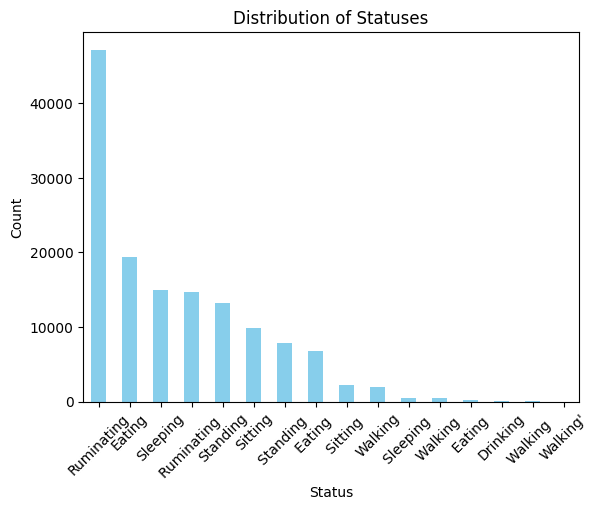

In [ ]:
import matplotlib.pyplot as plt

status_counts.plot(kind='bar', title='Distribution of Statuses', color='skyblue')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
appended_data['Status'] = appended_data['Status'].str.strip()


<ipython-input-64-0d348fa839df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_data['Status'] = appended_data['Status'].str.strip()


In [ ]:
appended_data['Status'] = appended_data['Status'].str.title()


<ipython-input-65-d723e243bff0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_data['Status'] = appended_data['Status'].str.title()


In [ ]:
unique_status = appended_data['Status'].unique()
status_counts = appended_data['Status'].value_counts()

print("Unique statuses:", unique_status)
print("\nStatus counts:")
print(status_counts)


Unique statuses: ['Standing' 'Ruminating' 'Walking' 'Sitting' 'Eating' 'Drinking'
 'Sleeping' "Walking'"]

Status counts:
Status
Ruminating    61913
Eating        26418
Standing      21098
Sleeping      15449
Sitting       12094
Walking        2474
Drinking         89
Walking'          1
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of Statuses'}, xlabel='Status'>

Text(0.5, 0, 'Status')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Ruminating'),
  Text(1, 0, 'Eating'),
  Text(2, 0, 'Standing'),
  Text(3, 0, 'Sleeping'),
  Text(4, 0, 'Sitting'),
  Text(5, 0, 'Walking'),
  Text(6, 0, 'Drinking'),
  Text(7, 0, "Walking'")])

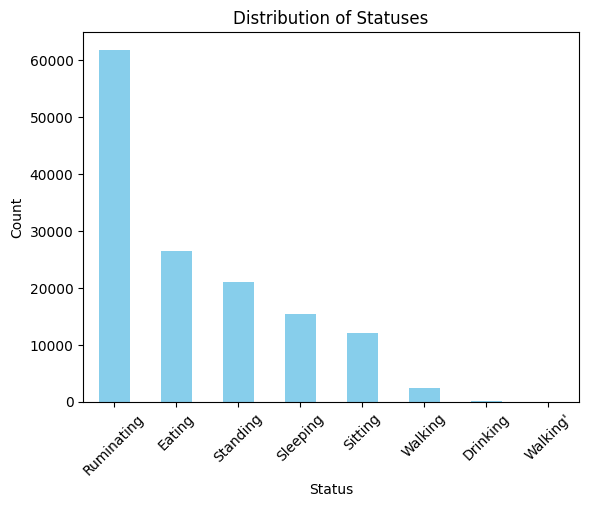

In [ ]:
status_counts.plot(kind='bar', title='Distribution of Statuses', color='skyblue')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
appended_data['Status'] = appended_data['Status'].replace({
    'Drinking': 'Eating',    # Merge 'Drinking' into 'Eating'
    "Walking'": 'Walking',  # Fix incorrect label
    'walking': 'Walking',   # Ensure consistency with case
})

<ipython-input-71-6d208cf57eb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_data['Status'] = appended_data['Status'].replace({


In [ ]:
unique_status = appended_data['Status'].unique()
print("Unique statuses after cleaning:", unique_status)

status_counts = appended_data['Status'].value_counts()
print("\nStatus counts after cleaning:")
print(status_counts)

Unique statuses after cleaning: ['Standing' 'Ruminating' 'Walking' 'Sitting' 'Eating' 'Sleeping']

Status counts after cleaning:
Status
Ruminating    61913
Eating        26507
Standing      21098
Sleeping      15449
Sitting       12094
Walking        2475
Name: count, dtype: int64


<Axes: title={'center': 'Movements of Cow no.1'}, xlabel='Status'>

Text(0.5, 0, 'Movement Status')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ruminating'),
  Text(1, 0, 'Eating'),
  Text(2, 0, 'Standing'),
  Text(3, 0, 'Sleeping'),
  Text(4, 0, 'Sitting'),
  Text(5, 0, 'Walking')])

<Figure size 300x6 with 0 Axes>

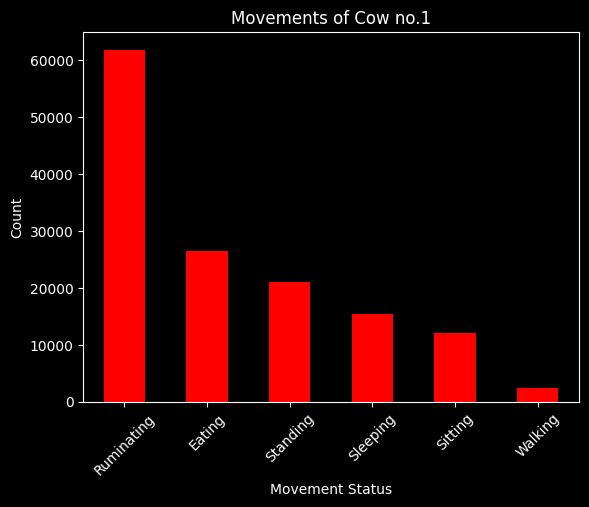

<Figure size 300x6 with 0 Axes>

In [ ]:
status_counts.plot(kind='bar', title='Movements of Cow no.1', color='red')
plt.xlabel('Movement Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.figure(figsize=(3, 0.06))
plt.show()